<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/kaggle_sales.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')
y = pd.DataFrame(df['sales'])
y_to_train = y[:-365]
y_to_test = y[-365:] # last year for testing

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

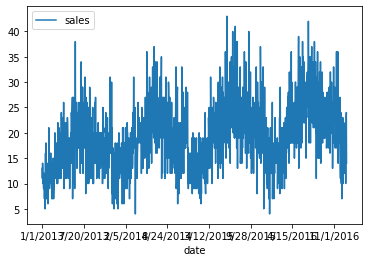

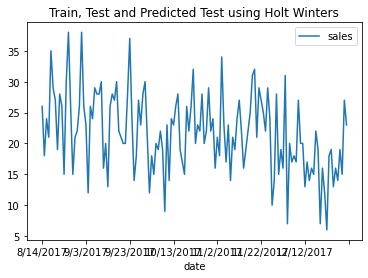

In [5]:
from matplotlib import pyplot as plt
y_to_train.plot(legend=True,label='TRAIN')
y_to_test[-140:].plot(legend=True,label='TEST',figsize=(6,4))
plt.title('Train, Test and Predicted Test using Holt Winters')

In [6]:
!pip install tbats

     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 14.6 MB/s 
     |████████████████████████████████| 9.8 MB 40.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
from tbats import TBATS, BATS# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(y_to_test,y_forecast)}')
print(f'Mean Squared Error = {mean_squared_error(y_to_test,y_forecast)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(y_to_test),np.array(y_forecast) )}')

Mean Absolute Error = 3.8577289832270028
Mean Squared Error = 23.637445028684905
Mean Absolute Percentage Error = 35.497625473230976


Holt Winters

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(y_to_train,trend='mul',seasonal='mul',seasonal_periods=365).fit()
test_predictions = fitted_model.forecast(365).rename('HW')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(y_to_test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(y_to_test,test_predictions)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(y_to_test),np.array(test_predictions) )}')

Mean Absolute Error = 5.859391287582682
Mean Squared Error = 56.80871732224168
Mean Absolute Percentage Error = 41.26774435015866
